# LONGITUDINAL CHARACTERISTICS VECTOR
This Jupyter Notebook contains main functions to explore the longitudinal characteristics vector for all ASV in the dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.linear_model import LinearRegression

from collections import Counter

In [2]:
#figure set
subject_cmap = {'male':'#d36135', 
        'female':'#ffb400' ,
        'donorA':'#227c9d', 
        'donorB':'#7fb069'}

noise_cmap = {0:'#0077b6', 1:'#ffd166'}

plt.rcParams['figure.dpi'] = 100
sns.set_style('whitegrid')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True
plt.rc('legend',fontsize=10, title_fontsize=10, edgecolor='k') # using a size in points

In [74]:
wd = './data/'

### Read longitudinal characteristics vector

In [75]:
df = pd.read_csv(wd + '/ts_charactericstics_tables/LONGITUDINAL_CHARACTERISTICS_DF.csv')
df.head()

,feature,subject,mean,std,acf_noise,ljung_box_noise,flattness_score,white_noise_binary,PC1_loading,PC2_loading,...,lag_1_corr,lag_2_corr,lag_3_corr,lag_4_corr,lag_5_corr,lag_6_corr,lag_7_corr,lag_8_corr,lag_9_corr,non_stationary
0,TACGGAGGGTGCGAGCGTTAATCGGAATAACTGGGCGTAAAGGGCA...,male,2.625,8.057,0,0.000,0.064,0,0.008,0.037,...,0.480,0.350,0.259,0.127,0.087,0.048,0.028,0.022,0.055,1
1,TACGTATGTCACAAGCGTTATCCGGATTTATTGGGCGTAAAGCGCG...,male,0.065,0.497,0,0.000,0.003,0,0.002,0.007,...,0.890,0.697,0.496,0.331,0.221,0.129,0.111,0.120,0.101,0
2,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGAG...,male,0.047,0.534,0,0.987,0.743,1,0.004,0.004,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0
3,TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAG...,male,0.194,0.581,0,0.114,0.143,0,0.005,0.001,...,0.317,-0.012,-0.032,-0.039,-0.010,0.041,0.058,0.026,-0.033,0
4,TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCG...,male,0.600,1.599,0,0.000,0.108,0,0.009,0.017,...,0.233,0.132,0.014,0.011,0.000,0.043,-0.019,-0.020,0.114,0


In [4]:
male_df = pd.read_csv(wd + 'ready_files/male_rarefied_18000_interpolated_pchip.tsv', sep = '\t', index_col = [0]).T
female_df = pd.read_csv(wd + 'ready_files/female_rarefied_18000_interpolated_pchip.tsv', sep = '\t', index_col = [0]).T
donorA_df = pd.read_csv(wd + 'ready_files/donorA_rarefied_18000_interpolated_pchip.tsv', sep = '\t', index_col = [0]).T
donorB_df = pd.read_csv(wd + 'ready_files/donorA_rarefied_18000_interpolated_pchip.tsv', sep ='\t', index_col = [0]).T

def filter_dataset(data, treshold=150):
    
    df = data.iloc[:treshold]
    df_sum = df.sum().reset_index().sort_values(by = [0])
    keep_features = df_sum[df_sum[0] != 0]['index'].values
    data_filtered = df[keep_features]
    
    return data_filtered

#donorB_df = filter_dataset(donorB_df)

datasets = [male_df, female_df, donorA_df, donorB_df]
subjects = ['male', 'female', 'donorA', 'donorB']

## 1. WHITE NOISE
### 1.a white noise tests results

Text(0, 0.5, 'flatness score')

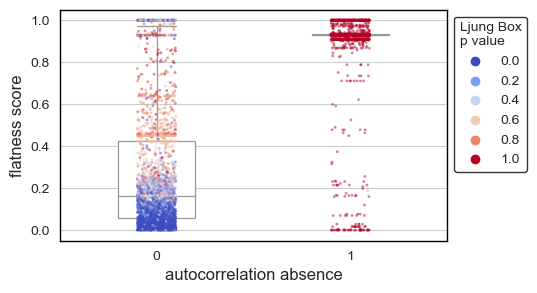

In [7]:
plt.figure(figsize = (5, 3))
sns.boxplot(x=df.acf_noise, y = df.flattness_score, color='white', fliersize = 0, linewidth=.9, width=.4)
sns.stripplot(x=df.acf_noise, y = df.flattness_score, hue = df.ljung_box_noise, palette = 'coolwarm', s=2, alpha=.5)
plt.legend(edgecolor='k', title='Ljung Box\np value', ncol=1, bbox_to_anchor=(1, 1))
plt.xlabel('autocorrelation absence', fontsize=12)
plt.ylabel('flatness score', fontsize=12)

/var/folders/9q/_zrfpjbd6djcym5nw2dyd59c0000gn/T/ipykernel_1947/2673197247.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y=df.ljung_box_noise, x = df.flattness_score, alpha=.7, s=30, palette = noise_cmap, marker='o')


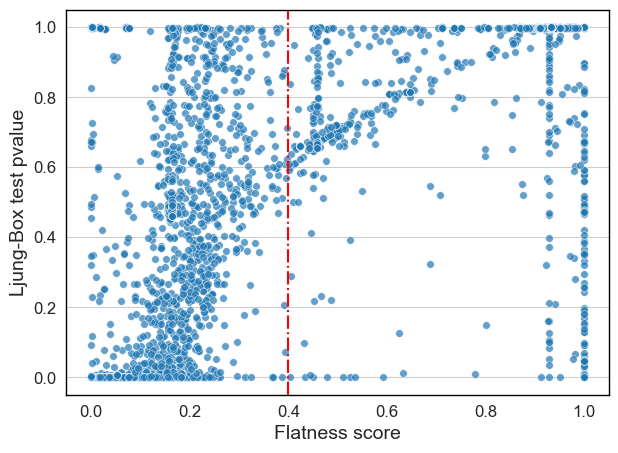

In [8]:
plt.figure(figsize = (7, 5))
sns.scatterplot(y=df.ljung_box_noise, x = df.flattness_score, alpha=.7, s=30, palette = noise_cmap, marker='o')
plt.ylabel('Ljung-Box test pvalue', fontsize=14)
plt.xlabel('Flatness score', fontsize=14)
plt.axvline(0.4, linestyle='-.', color='r')

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

### 1b. WHITE NOISE vs PCA LOADING

/var/folders/9q/_zrfpjbd6djcym5nw2dyd59c0000gn/T/ipykernel_1947/4048841333.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df.flattness_score,
/var/folders/9q/_zrfpjbd6djcym5nw2dyd59c0000gn/T/ipykernel_1947/4048841333.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df.flattness_score,


Text(0.5, -0.1, 'flatness score')

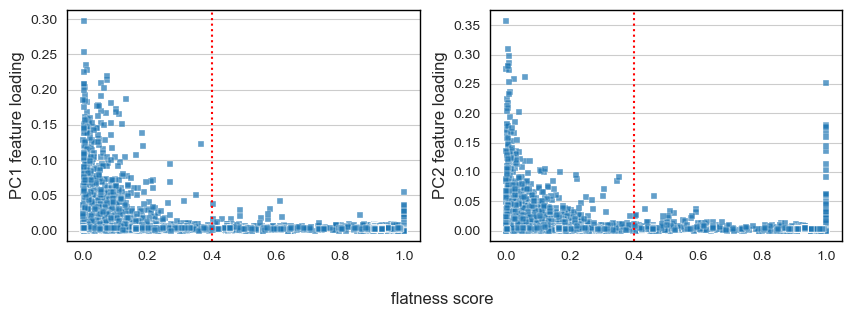

In [9]:
#analyse noise vs loadings
fig, ax = plt.subplots(1, 2, figsize = (10, 3), sharex = True)
sns.scatterplot(x = df.flattness_score, 
                y = df.PC1_loading, 
                marker='s', 
                alpha=.7, 
                s=20,
                palette = noise_cmap,
                ax=ax[0], legend=False)

sns.scatterplot(x = df.flattness_score, 
                y = df.PC2_loading, 
                marker='s', 
                alpha=.7,
                s=20,
                palette = noise_cmap,
                ax=ax[1], legend=False)

ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].set_ylabel('PC1 feature loading', fontsize=12)
ax[1].set_ylabel('PC2 feature loading', fontsize=12)

ax[0].axvline(0.4, linestyle = ':', color='r')
ax[1].axvline(0.4, linestyle = ':', color='r')

fig.text(0.5, -0.1, 'flatness score', ha='center', fontsize=12)

### 1c. LjungBox test pvalue vs PCA loadings

/var/folders/9q/_zrfpjbd6djcym5nw2dyd59c0000gn/T/ipykernel_1947/710571562.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df.ljung_box_noise,
/var/folders/9q/_zrfpjbd6djcym5nw2dyd59c0000gn/T/ipykernel_1947/710571562.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df.ljung_box_noise,


Text(0.5, -0.1, 'Ljung-Box test pvalue')

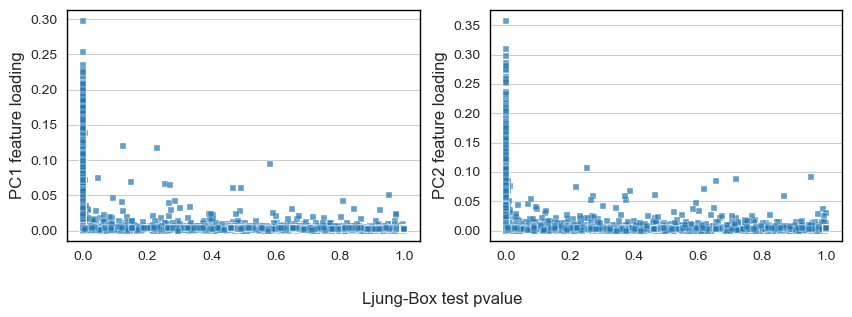

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3), sharex = True)
sns.scatterplot(x = df.ljung_box_noise, 
                y = df.PC1_loading, 
                marker='s', 
                alpha=.7, 
                s=20,
                palette = noise_cmap,
                ax=ax[0], 
                legend=False)

sns.scatterplot(x = df.ljung_box_noise, 
                y = df.PC2_loading, 
                marker='s', 
                alpha=.7,
                s=20,
                palette = noise_cmap,
                ax=ax[1],
                legend=False)

ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].set_ylabel('PC1 feature loading', fontsize=12)
ax[1].set_ylabel('PC2 feature loading', fontsize=12)

fig.text(0.5, -0.1, 'Ljung-Box test pvalue', ha='center', fontsize=12)

### 1d. white noise vs PCA loadings boxplots

In [11]:
df['loading'] = df.PC1_loading + df.PC2_loading

/var/folders/9q/_zrfpjbd6djcym5nw2dyd59c0000gn/T/ipykernel_1947/2588054400.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = df.white_noise_binary,


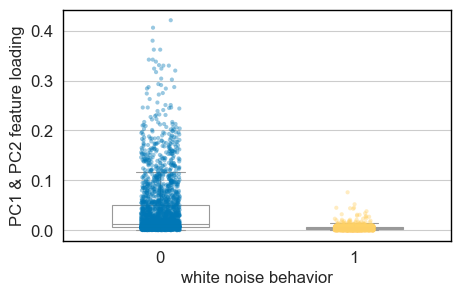

In [12]:
plt.figure(figsize = (5, 3))
sns.boxplot(x = df.white_noise_binary, 
            y = df.loading, 
            fliersize=0, 
            color='white',
            width=.5, 
            linewidth=.8)
sns.stripplot(x = df.white_noise_binary, 
            y = df.loading, 
              s=3, 
              alpha=.4, 
              edgecolor= 'k', 
              palette = ['#0077b6', '#ffd166']
             )

plt.ylabel('PC1 & PC2 feature loading', fontsize=12)
plt.xlabel('white noise behavior', fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

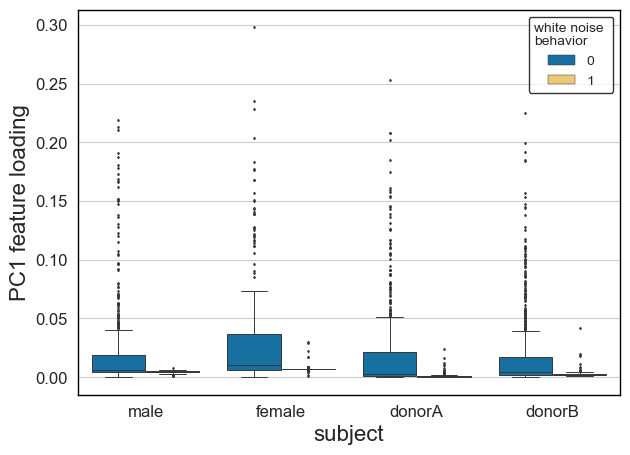

In [13]:
plt.figure(figsize = (7, 5))
sns.boxplot(x = df.subject, 
            y = df.PC1_loading,
            hue = df['white_noise_binary'], 
            fliersize = 1, 
            width=.8,
            linewidth=.7,
           palette = noise_cmap)

plt.legend(title='white noise \nbehavior', edgecolor='k')

plt.ylabel('PC1 feature loading', fontsize=16)
plt.xlabel('subject', fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

### 1d. white noise per person

In [14]:
WHITE_NOISE_DF = pd.DataFrame()
for i in range(0, 4):
    
    d=Counter(df[df['subject'] == subjects[i]].white_noise_binary)
    res_df = pd.DataFrame.from_dict(d, orient='index').reset_index()
    res_df.columns = ['white noise behavior', 'count']
    res_df = res_df.set_index('white noise behavior').T
    res_df['subject'] = subjects[i]
    WHITE_NOISE_DF = pd.concat([WHITE_NOISE_DF, res_df])
    
WHITE_NOISE_DF = WHITE_NOISE_DF.set_index('subject')
WHITE_NOISE_DF['total'] = WHITE_NOISE_DF.sum(axis=1)
WHITE_NOISE_DF=WHITE_NOISE_DF.reset_index()

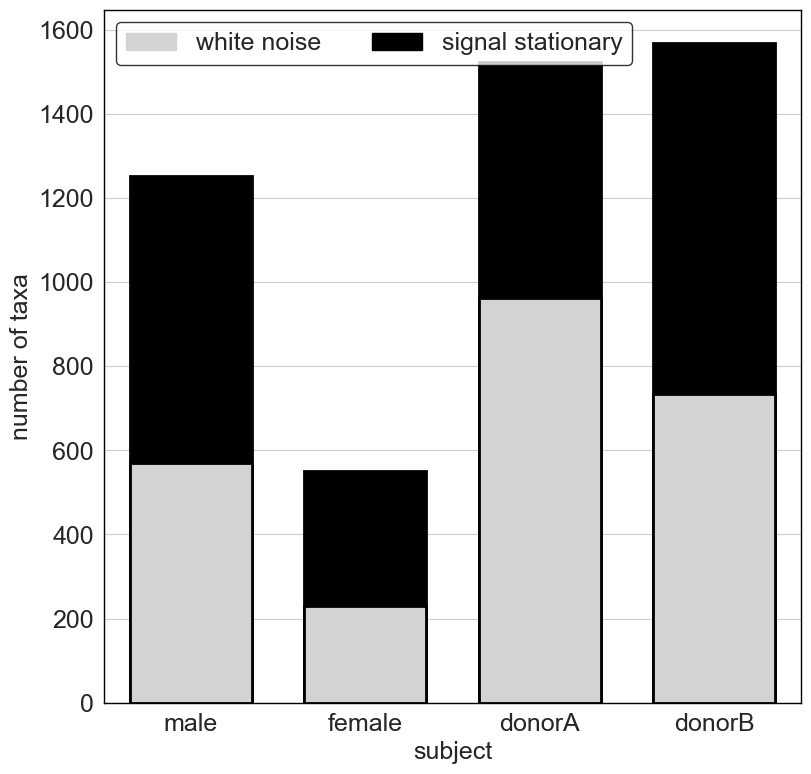

In [15]:
#palette = ['#0077b6', '#ffd166']

plt.figure(figsize = (9, 9))
sns.barplot(data = WHITE_NOISE_DF, x = 'subject', y = 'total', color = 'black', edgecolor='k', lw=2, errorbar=None, width = .7)
sns.barplot(data = WHITE_NOISE_DF, x = 'subject', y = WHITE_NOISE_DF[1], color = 'lightgrey', edgecolor='k', lw=2, errorbar=None, width = .7)

signal_patch = mpatches.Patch(color='black', label='signal stationary')
wn_patch = mpatches.Patch(color='lightgrey', label='white noise')

plt.legend(handles=[wn_patch, signal_patch], ncol=3, edgecolor='k', fontsize=18)#, bbox_to_anchor = (1, 1.15), loc='upper right')
plt.ylabel('number of taxa', fontsize = 18)
plt.xlabel('subject', fontsize = 18)

plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)
plt.savefig('fig1.svg', dpi=300)

## 2. STATIONARITY

In [60]:
results = []
for subject in DF.subject.unique():
    
    stat_df = DF[DF['subject'] == subject]

    results.append({'subject':subject,
                    'n': stat_df.stationary.sum(),
                   'category':'stationary'})

    results.append({'subject':subject,
                    'n': stat_df.non_stationary.sum(),
                   'category':'non_stationary'})

    results.append({'subject':subject,
                    'n': stat_df.non_stationary.sum()+ stat_df.stationary.sum(),
                   'category':'sum'})

In [63]:
STATIONARY_DF = pd.DataFrame(results)
STATIONARY_DF.head()

,subject,n,category
0,male,990,stationary
1,male,261,non_stationary
2,male,1251,sum
3,female,461,stationary
4,female,89,non_stationary


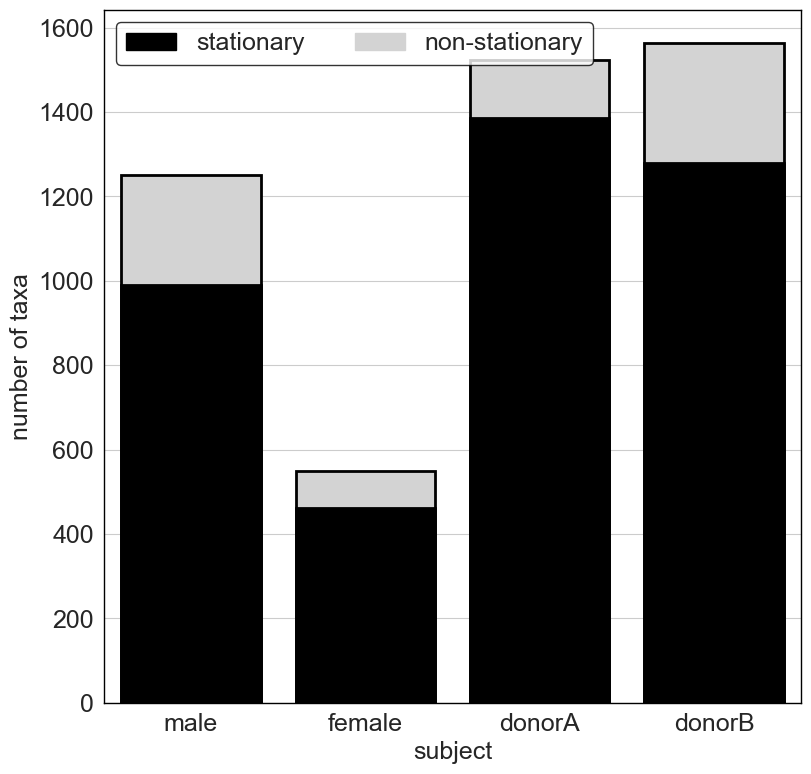

In [67]:
plt.figure(figsize = (9, 9))

sns.barplot(data = STATIONARY_DF[STATIONARY_DF['category'] == 'sum'], x = 'subject', y = 'n', color='lightgrey', edgecolor='k', lw=2)
sns.barplot(data = STATIONARY_DF[STATIONARY_DF['category'] == 'stationary'], x = 'subject', y = 'n', color= 'k', edgecolor='k', lw=2)

signal_patch = mpatches.Patch(color='black', label='stationary')
wn_patch = mpatches.Patch(color='lightgrey', label='non-stationary')

plt.legend(handles=[signal_patch, wn_patch], 
           edgecolor='k', ncol=2, fontsize=18)

plt.ylabel('number of taxa', fontsize = 18)
plt.xlabel('subject', fontsize = 18)

plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

#plt.savefig('fig2.svg', dpi=300)

## 3. TREND

Text(0.5, 0, 'subject')

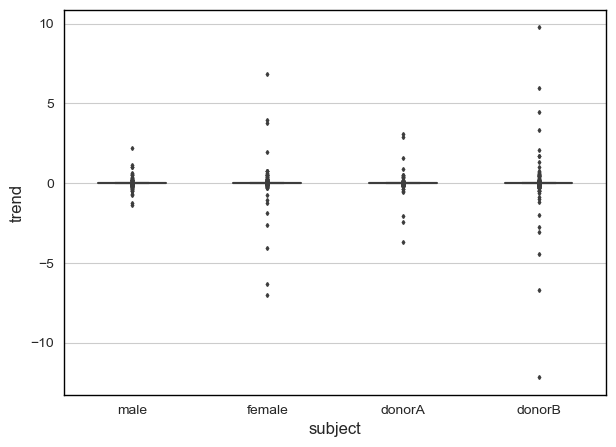

In [68]:
plt.figure(figsize = (7, 5))
sns.boxplot(x = df.subject, y = df.trend, fliersize = 2, width=.5)
plt.ylabel('trend', fontsize = 12)
plt.xlabel('subject', fontsize = 12)

## 4. PREVALENCE

Text(0.04, 0.5, 'number of taxa')

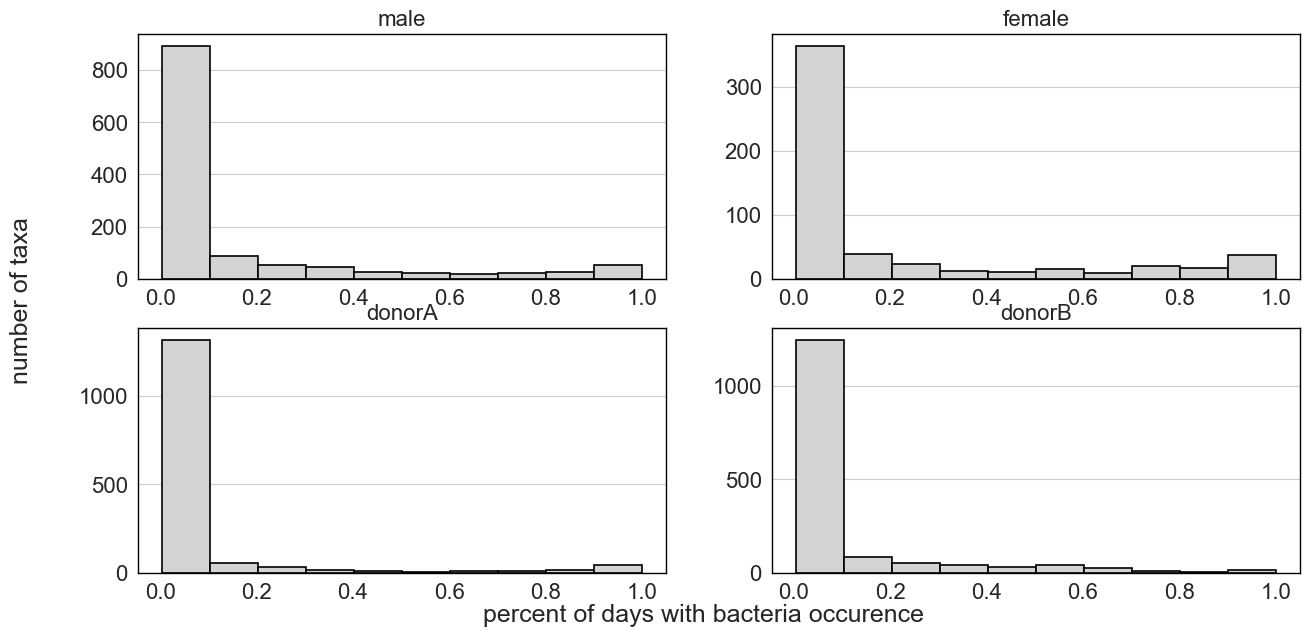

In [69]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (15, 7))

kwargs ={'color': 'lightgrey', 'edgecolor':'k', 'lw':1.2}

ax[0, 0].hist(df[df['subject'] == subjects[0]].prevalence.values, **kwargs)
ax[0, 1].hist(df[df['subject'] == subjects[1]].prevalence.values, **kwargs)
ax[1, 0].hist(df[df['subject'] == subjects[2]].prevalence.values, **kwargs)
ax[1, 1].hist(df[df['subject'] == subjects[3]].prevalence.values, **kwargs)

ax[0, 0].set_title('male', size=16)
ax[0, 1].set_title('female', size=16)
ax[1, 0].set_title('donorA', size=16)
ax[1, 1].set_title('donorB', size=16)

ax[0, 0].tick_params(axis='both', which='major', labelsize=16)
ax[0, 0].tick_params(axis='both', which='minor', labelsize=16)

ax[0, 1].tick_params(axis='both', which='major', labelsize=16)
ax[0, 1].tick_params(axis='both', which='minor', labelsize=16)

ax[1, 0].tick_params(axis='both', which='major', labelsize=16)
ax[1, 0].tick_params(axis='both', which='minor', labelsize=16)

ax[1, 1].tick_params(axis='both', which='major', labelsize=16)
ax[1, 1].tick_params(axis='both', which='minor', labelsize=16)

fig.text(0.5, 0.04, '\n percent of days with bacteria occurence', ha='center', fontsize=18)
fig.text(0.04, 0.5, 'number of taxa', va='center', rotation='vertical', fontsize=18)


#plt.savefig('6.svg', dpi=300)

## 5. AUTOCORRELATION

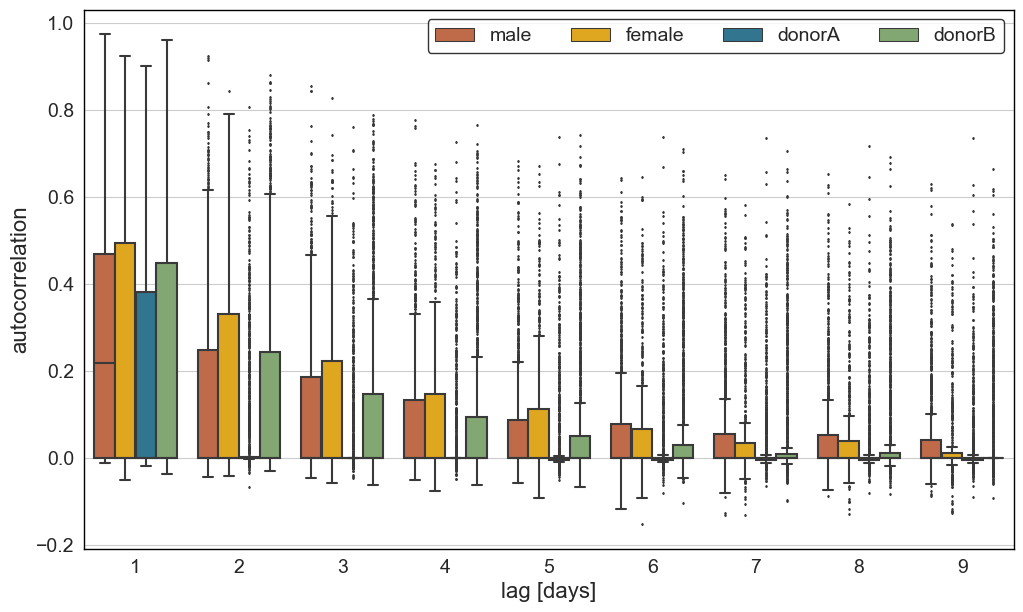

In [70]:
autocorr_df = pd.read_csv(wd + 'ts_charactericstics_tables/autocorrelation.csv', index_col = [0])

plt.figure(figsize = (12, 7))
sns.boxplot(data=autocorr_df, x = 'lag', y = 'acf_adj', hue='subject', fliersize=1, palette = subject_cmap)
plt.xlabel('lag [days]',fontsize=16)
plt.ylabel('autocorrelation',fontsize=16)

plt.legend(fontsize=14, ncol=4)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

## 6. FEATURES HEATMAP

In [71]:
df_corr = df[['std', 'mean','prevalence', 'PC1_loading', 'PC2_loading','flattness_score', 'dominant_seasonality_adj',#'dominant_mode_score',
              'seasonal', 'trend', 'stationary', 'non_stationary', 'white_noise_binary', 'lag_1_corr', 'lag_2_corr', 'lag_3_corr']]

df_corr = df_corr.astype(float)
df_corr.columns = ['standard deviation',
                   'mean',
                   'prevalence',
                   'PC1 loading',
                   'PC2 loading',
                   'flatness score',
                   'dominant seasonality adj',
                   'seasonal',
                   'trend',
                   'stationarity',
                   'non stationarity', 
                   'white noise behavior',
                   '1st lag ACF',
                   '2nd lag ACF',
                   '3rd lag ACF']

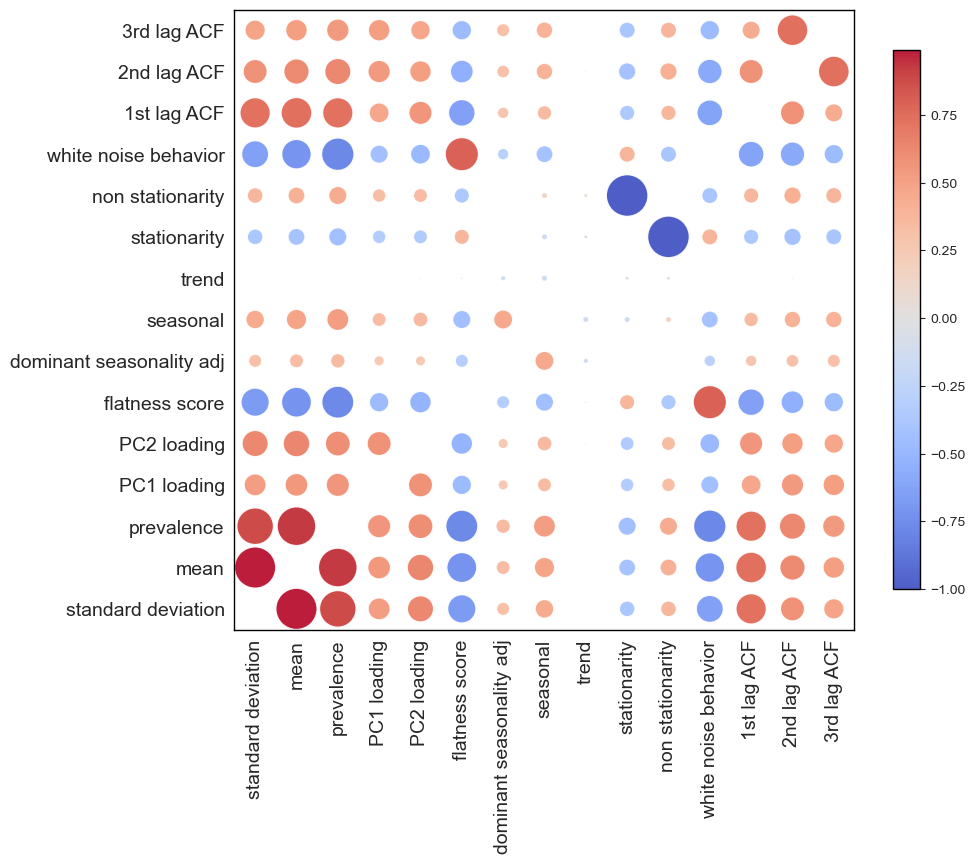

In [72]:
from matplotlib.collections import PatchCollection

corr_matrix = df_corr.corr(method='spearman')              
matrix = np.round(corr_matrix, 2)
np.fill_diagonal(matrix.values, 0)
#L = matrix.columns.tolist()
#matrix = matrix[list(reversed(L))]
#mask_con_corr = corr_matrix[(corr_matrix >= 0.1) | (corr_matrix <= -0.1)]

#matrix = np.triu(mask_con_corr)

N = matrix.shape[1]
M = matrix.shape[0]
#ylabels = matrix.columns.tolist()
ylabels = matrix.columns.tolist()#[::-1]
xlabels = matrix.index.tolist()#[::-1]

x, y = np.meshgrid(np.arange(M), np.arange(N))
s =np.transpose(matrix.values)
c = np.transpose(matrix.values)

fig, ax = plt.subplots(figsize = (10, 10))

R = s/s.max()/2
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="coolwarm", alpha = .9,  edgecolor=None)
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)

ax.grid(which='minor', c='white')
ax.grid(which='major', c='white')

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.set_aspect("equal", "box")
ax.set_xticklabels(rotation=90, labels=xlabels)

fig.colorbar(col, shrink = 0.7)
plt.savefig('fig4.svg', dpi=300)
plt.show()